In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [4]:
# Import dataset 
df = pd.read_csv('../data/Webmd_and_Wellrx.csv')

In [5]:
# Groupby dataset by drug and get total amount of review counts

group = df.groupby('drug')
total_reviews = pd.DataFrame(group.size())

In [6]:
# Import seaborn and plotly

import seaborn as sns
import plotly
# Connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [7]:
# From database extract just the drug and price in a list 

drug_price = df.groupby(['drug','price'])
drug_price_list = list(drug_price.groups.keys())

In [8]:
# Unzip drug_price_list to two separate lists 
unziped_drug_price = [[ i for i, j in drug_price_list ], 
                      [ j for i, j in drug_price_list]]

# Add '$' to price list

dollar_sign = ' '.join("${:,.2f}".format(n) for n in unziped_drug_price[1])
list_of_dollar_sign = [i for i in dollar_sign.split()]

In [9]:
# Plotly plot of Most Reviewed WebMD drugs and their WellRX prices!!

import plotly.graph_objects as go
import numpy as np

subject = total_reviews.index.values.tolist()
score = total_reviews[0].values.tolist()
price = unziped_drug_price[1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=subject,
    y=score,
    mode="markers",
    hovertext= list_of_dollar_sign,
    marker=go.scatter.Marker(
        size = 10,
        color=price,
        colorbar= dict(title='Price'),
        opacity=1,
        colorscale="Spectral",
        reversescale=True,
        showscale=True
    )
))
fig.update_layout(title='Most Reviewed WebMD drugs and their WellRX prices')
fig.update_yaxes(title_text='Number of Reviews')
fig.show()

In [10]:
# Dataframes

# Drug Dataframe
drug = df.groupby(['drug']).mean().round(2).reset_index()

# Drug Dataframe with Drug frequency
drug_total_reviews = pd.merge(drug,total_reviews, on = 'drug', how = 'left').rename(columns={0:'count'})

# Top 5 Drugs
top5_reviews = drug_total_reviews.sort_values(by = ['count'], ascending = False)[:5]

In [11]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=[go.Table(
    header=dict(values=list(top5_reviews.columns.drop('count')),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top5_reviews.drug, top5_reviews.Effectiveness, top5_reviews.Ease, top5_reviews.Satisfaction, top5_reviews.price],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Top 5 Reviewed WebMD Drugs and Price')
fig.show()



In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Effectiveness', x= top5_reviews['drug'], y= top5_reviews['Effectiveness']),
    go.Bar(name='Ease', x = top5_reviews['drug'], y = top5_reviews['Ease']),
    go.Bar(name='Satisfaction', x = top5_reviews['drug'], y = top5_reviews['Satisfaction'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title='Top 5 Reviewed WebMD drugs and their scores')
fig.show()

In [13]:
# Data manipulation for Top 5 Conditions for Top 5 drugs 
# I can definitely clean this up later

a = df.set_index(['drug'])

a1 = a.loc[['Cymbalta oral']]
a2 = a1['Condition'].value_counts()
a3 = a2.to_frame()
a4 = a3.reset_index()
a4['index'][:5]


b1 = a.loc[['lisinopril oral']]
b2 = b1['Condition'].value_counts()
b3 = b2.to_frame()
b4 = b3.reset_index()
b4['index'][:5]

c1 = a.loc[['Lexapro oral']]
c2 = c1['Condition'].value_counts()
c3 = c2.to_frame()
c4 = c3.reset_index()
c4['index'][:5]

d1 = a.loc[['hydrocodone-acetaminophen oral']]
d2 = d1['Condition'].value_counts()
d3 = d2.to_frame()
d4 = d3.reset_index()
d4['index'][:5]

e1 = a.loc[['Effexor XR oral']]
e2 = e1['Condition'].value_counts()
e3 = e2.to_frame()
e4 = e3.reset_index()
e4['index'][:5]

0                       Depression
1     Repeated Episodes of Anxiety
2           "Change of Life" Signs
3                   Panic Disorder
4               Bipolar Depression
Name: index, dtype: object

In [14]:
# Pie chart for Top Conditions Treated for Top 5 Rated WebMD Drugs

import plotly.graph_objects as go
from plotly.subplots import make_subplots

color = ['rgb(31, 119, 180)', 'rgb(128, 183, 186)', 'rgb(109, 161, 174)',
                'rgb(101, 98, 114)', 'rgb(180, 133, 99)']
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=3, specs=specs)

# Define pie charts 
fig.add_trace(go.Pie(labels=a4['index'][:5], values=a3['Condition'][:5], name='Cymbalta oral', marker_colors=color),1,1)
fig.add_trace(go.Pie(labels=b4['index'][:5], values=b3['Condition'][:5], name='lisinopril oral', marker_colors=color),1,2)
fig.add_trace(go.Pie(labels=c4['index'][:5], values=c3['Condition'][:5], name='Lexapro oral', marker_colors=color),2,1)
fig.add_trace(go.Pie(labels=d4['index'][:5], values=d3['Condition'][:5], name='hydrocodone-acetaminophenoral', marker_colors=color),2,2)
fig.add_trace(go.Pie(labels=e4['index'][:5], values=e3['Condition'][:5], name='Effexor XR oral', marker_colors=color),1,3)


# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
fig.update(layout_title_text='Top Conditions Treated for Top 5 Rated WebMD Drugs',
           layout_showlegend=False)

fig = go.Figure(fig)
fig.show()

In [15]:
condition = df.groupby('Condition')
condition_count = pd.DataFrame(condition.size()).reset_index().rename(columns={0:'count'})
condition_stats = condition.mean().round(2).reset_index()
condition_df = pd.merge(condition_stats, condition_count, how = 'left', on = 'Condition')

In [16]:
condition_df.columns

Index(['Condition', 'Effectiveness', 'Ease', 'Satisfaction', 'price', 'count'], dtype='object')

best fit line:
y = 97.71 + 0.70x


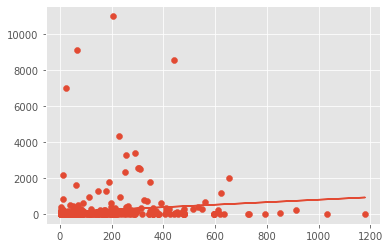

In [17]:
# Get the Line of Best Fit 
X = condition_df['price']
Y = condition_df['count']

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [18]:
import plotly.express as px

fig = px.scatter(condition_df, x="price", y="count",hover_data=['Condition'])

# Line of best fit
Y2 = [(97.71 + 0.70 * x) for x in range(int(max(X) + 1))]
X2 = list(range(len(Y2)))

fig.add_trace(go.Scatter(x= X2, y= Y2))

fig.update_layout(title='Most Common Conditions and Average Cost for Treatment')
fig.update_layout(showlegend=False)
fig.show()

In [19]:
# Top 5 Conditions and Average Scores

top5_condition = condition_df.sort_values(by = ['count'], ascending = False)[:6]

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Effectiveness', x= top5_condition['Condition'], y= top5_condition['Effectiveness']),
    go.Bar(name='Ease', x = top5_condition['Condition'], y = top5_condition['Ease']),
    go.Bar(name='Satisfaction', x = top5_condition['Condition'], y = top5_condition['Satisfaction'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title='Top 5 Conditions and their average scores')
fig.show()

In [20]:
# Top 5 Drugs for each condition

f = df.set_index(['Condition'])

f1 = f.loc[[' Other']]
f2 = f1['drug'].value_counts()
f3 = f2.to_frame()
f4 = f3.reset_index()
f4['index'][:5]

g1 = f.loc[[' Pain']]
g2 = g1['drug'].value_counts()
g3 = g2.to_frame()
g4 = g3.reset_index()
g4['index'][:5]

h1 = f.loc[[' Depression']]
h2 = h1['drug'].value_counts()
h3 = h2.to_frame()
h4 = h3.reset_index()
h4['index'][:5]

i1 = f.loc[[' High Blood Pressure']]
i2 = i1['drug'].value_counts()
i3 = i2.to_frame()
i4 = i3.reset_index()
i4['index'][:5]

j1 = f.loc[[' Neuropathic Pain']]
j2 = j1['drug'].value_counts()
j3 = j2.to_frame()
j4 = j3.reset_index()
j4['index'][:5]

k1 = f.loc[[' Repeated Episodes of Anxiety']]
k2 = k1['drug'].value_counts()
k3 = k2.to_frame()
k4 = k3.reset_index()
k4['index'][:5]

0       Lexapro oral
1         Xanax oral
2      Cymbalta oral
3    Effexor XR oral
4        Celexa oral
Name: index, dtype: object

In [31]:
# Pie chart for Top Conditions Treated for Top 5 Rated WebMD Drugs

import plotly.graph_objects as go
from plotly.subplots import make_subplots

color = ['rgb(31, 119, 180)', 'rgb(128, 183, 186)', 'rgb(109, 161, 174)',
                'rgb(101, 98, 114)', 'rgb(180, 133, 99)']
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=3, specs=specs)

# Define pie charts 
fig.add_trace(go.Pie(labels=f4['index'][:5], values=f3['drug'][:5], name='Other', marker_colors=color, text=["Text D"]),1,1)
fig.add_trace(go.Pie(labels=g4['index'][:5], values=g3['drug'][:5], name='Pain', marker_colors=color),1,2)
fig.add_trace(go.Pie(labels=h4['index'][:5], values=h3['drug'][:5], name='Depression', marker_colors=color),2,1)
fig.add_trace(go.Pie(labels=i4['index'][:5], values=i3['drug'][:5], name='High Blood Pressure', marker_colors=color),2,2)
fig.add_trace(go.Pie(labels=j4['index'][:5], values=j3['drug'][:5], name='Neuropathic Pain', marker_colors=color),1,3)
fig.add_trace(go.Pie(labels=k4['index'][:5], values=k3['drug'][:5], name='Repeated Episodes of Anxiety', marker_colors=color),2,3)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
fig.update(layout_title_text='Top Drugs for Top Conditions',
           layout_showlegend=False)

fig = go.Figure(fig)
fig.show()

In [22]:
# 3 graphs #should i do groupby with drug and condition
#not good
import plotly.express as px
what = df.groupby(['drug','Condition'])
whoa = what.mean().reset_index()
fig = px.scatter(whoa, x="Effectiveness", y="price", hover_name="drug", hover_data=["Condition"])

# Line of best fit


fig.update_layout(title='Most Common Conditions and Average Cost for Treatment')
fig.update_layout(showlegend=False)
fig.show()

best fit line:
y = 37.67 + 19.17x


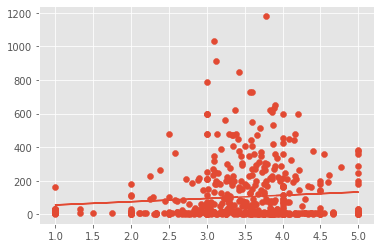

In [23]:
X = condition_df['Effectiveness']
Y = condition_df['price']

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [24]:
# 3 graphs #should i do groupby with drug and condition
# Get the Line of Best Fit 

#y = 37.67 + 19.17x
import plotly.express as px

fig = px.scatter(condition_df, x="Effectiveness", y="price", hover_data = ["Condition"])

# Line of best fit

X2 = list(range(len(Y2)))
Y2 = [(37.67 + 19.17 * x) for x in range(int(max(X) + 1))]
fig.add_trace(go.Scatter(x= X2, y= Y2,mode='lines', name='lines'))

fig.update_layout(title='Most Common Conditions and Average Cost for Treatment')
fig.update_layout(showlegend=False)
fig.show()

best fit line:
y = -27.50 + 35.05x


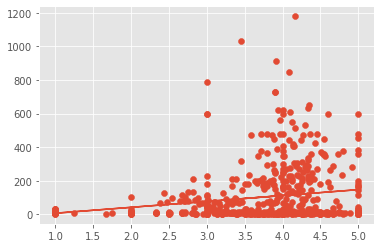

In [25]:
X = condition_df['Ease']
Y = condition_df['price']

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [26]:
import plotly.express as px

fig = px.scatter(condition_df, x="Ease", y="price", hover_data = ['Condition'])
#y = -27.50 + 35.05x
# Line of best fit
X2 = list(range(len(Y2)))
Y2 = [(-27.50 + 35.05 * x) for x in range(int(max(X) + 1))]
fig.add_trace(go.Scatter(x= X2, y= Y2,mode='lines', name='lines'))


fig.update_layout(title='Most Common Conditions and Average Cost for Treatment')
fig.update_layout(showlegend=False)
fig.show()

best fit line:
y = 36.27 + 22.52x


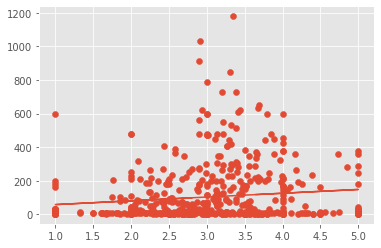

In [27]:
X = condition_df['Satisfaction']
Y = condition_df['price']

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [28]:
import plotly.express as px

fig = px.scatter(condition_df, x="Satisfaction", y="price", hover_data = ['Condition'])
#y = 36.27 + 22.52x
# Line of best fit
X2 = list(range(len(Y2)))
Y2 = [(36.27 + 22.52 * x) for x in range(int(max(X) + 1))]
fig.add_trace(go.Scatter(x= X2, y= Y2,mode='lines', name='lines'))

fig.update_layout(title='Most Common Conditions and Average Cost for Treatment')
fig.update_layout(showlegend=False)
fig.show()